# Matrix Multiplication: Theory, Implementation, and Applications



In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## 1. Theory of Matrix Multiplication (60 minutes)

### 1.1 Definition and Basic Properties

Matrix multiplication for matrices $A$ (m × n) and $B$ (n × p) is defined as:

$$ C_{ij} = \sum_{k=1}^n A_{ik}B_{kj} $$

Properties:
1. Not commutative: In general, $AB \neq BA$
2. Associative: $(AB)C = A(BC)$
3. Distributive over addition: $A(B+C) = AB + AC$
4. Identity matrix: For any matrix $A$, $AI = IA = A$

### 1.2 Dimensions in Matrix Multiplication

For $AB$ to be defined, the number of columns in $A$ must equal the number of rows in $B$.

In [2]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B)

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nMatrix C = AB:")
print(C)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Matrix C = AB:
[[19 22]
 [43 50]]


Non-commutativity

In [3]:
D = np.dot(B, A)
print("\nMatrix D = BA:")
print(D)
print("\nAB == BA:", np.array_equal(C, D))


Matrix D = BA:
[[23 34]
 [31 46]]

AB == BA: False


Matrix Multiplication Dimensions

In [4]:
def can_multiply(shape1, shape2):
    return shape1[1] == shape2[0]

# Test cases
print(can_multiply((2, 3), (3, 2)))  # Should return True
print(can_multiply((3, 2), (2, 3)))  # Should return True
print(can_multiply((2, 3), (2, 3)))  # Should return False

True
True
False



### 1.3 Special Matrices in Multiplication
1. Identity Matrix
2. Zero Matrix
3. Diagonal Matrix

In [5]:
n = 3
I = np.eye(n)
zero = np.zeros((n, n))
diagonal = np.diag([1, 2, 3])

print("Identity Matrix:")
print(I)
print("\nZero Matrix:")
print(zero)
print("\nDiagonal Matrix:")
print(diagonal)

Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zero Matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Diagonal Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [7]:
### Properties of Special Matrices

A = np.random.rand(3, 3)
print("Random Matrix A:")
print(A)
print("\nA * I == A:", np.allclose(np.dot(A, I), A))
print("A * Zero == Zero:", np.allclose(np.dot(A, zero), zero))


Random Matrix A:
[[0.35764081 0.2361614  0.68382687]
 [0.46685723 0.65953188 0.72831683]
 [0.03804511 0.78311876 0.26611143]]

A * I == A: True
A * Zero == Zero: True


## 2. Implementation and Performance Comparison

Matrix size: 10x10
Pure Python time: 0.000060 seconds
NumPy time: 0.000096 seconds
NumPy is 0.62 times faster

Matrix size: 50x50
Pure Python time: 0.006461 seconds
NumPy time: 0.000183 seconds
NumPy is 35.29 times faster

Matrix size: 100x100
Pure Python time: 0.040367 seconds
NumPy time: 0.000213 seconds
NumPy is 189.60 times faster

Matrix size: 200x200
Pure Python time: 0.358980 seconds
NumPy time: 0.010113 seconds
NumPy is 35.50 times faster

Matrix size: 500x500
Pure Python time: 5.776426 seconds
NumPy time: 0.004690 seconds
NumPy is 1231.67 times faster



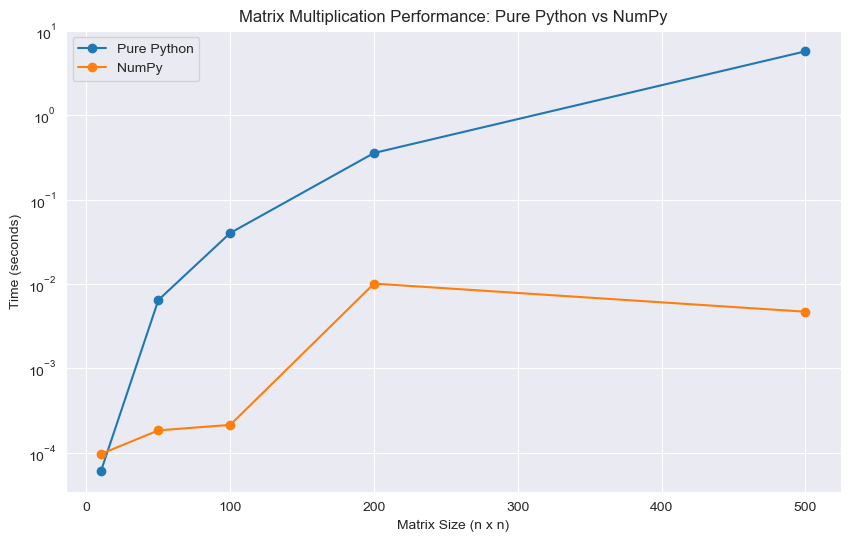

In [8]:
### 2.1 Pure Python Implementation

def matrix_multiply_python(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Matrix dimensions are not compatible for multiplication")
    
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

### 2.2 NumPy Implementation

def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

### 2.3 Performance Comparison

def compare_performance(sizes):
    python_times = []
    numpy_times = []
    
    for n in sizes:
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        
        A_list = A.tolist()
        B_list = B.tolist()
        
        # Time pure Python implementation
        start = time.time()
        matrix_multiply_python(A_list, B_list)
        python_time = time.time() - start
        python_times.append(python_time)
        
        # Time NumPy implementation
        start = time.time()
        matrix_multiply_numpy(A, B)
        numpy_time = time.time() - start
        numpy_times.append(numpy_time)
        
        print(f"Matrix size: {n}x{n}")
        print(f"Pure Python time: {python_time:.6f} seconds")
        print(f"NumPy time: {numpy_time:.6f} seconds")
        print(f"NumPy is {python_time / numpy_time:.2f} times faster")
        print()
    
    return python_times, numpy_times

sizes = [10, 50, 100, 200, 500]
python_times, numpy_times = compare_performance(sizes)

plt.figure(figsize=(10, 6))
plt.plot(sizes, python_times, marker='o', label='Pure Python')
plt.plot(sizes, numpy_times, marker='o', label='NumPy')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance: Pure Python vs NumPy')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()


 Implementation Techniques

In [ ]:
def block_matrix_multiply(A, B, block_size=32):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(0, n, block_size):
        for j in range(0, n, block_size):
            for k in range(0, n, block_size):
                for ii in range(i, min(i + block_size, n)):
                    for jj in range(j, min(j + block_size, n)):
                        for kk in range(k, min(k + block_size, n)):
                            C[ii][jj] += A[ii][kk] * B[kk][jj]
    return C

# Compare performance with block matrix multiplication
n = 500
A = np.random.rand(n, n).tolist()
B = np.random.rand(n, n).tolist()

start = time.time()
C_standard = matrix_multiply_python(A, B)
standard_time = time.time() - start

start = time.time()
C_block = block_matrix_multiply(A, B)
block_time = time.time() - start

print(f"Standard multiplication time: {standard_time:.6f} seconds")
print(f"Block multiplication time: {block_time:.6f} seconds")
print(f"Speedup: {standard_time / block_time:.2f}x")



## Practice Problems

1. Implement a function to check if two matrices can be multiplied.
2. Create a function that performs element-wise matrix multiplication (Hadamard product).
3. Implement matrix-vector multiplication and compare its performance with matrix-matrix multiplication.
4. Create a function to calculate the trace of a matrix product AB without explicitly computing the product.

# Your implementations here

# 1. Check if matrices can be multiplied
def can_multiply(A, B):
    return len(A[0]) == len(B)

# 2. Hadamard product
def hadamard_product(A, B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must have the same dimensions")
    return [[A[i][j] * B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

# 3. Matrix-vector multiplication
def matrix_vector_multiply(A, v):
    if len(A[0]) != len(v):
        raise ValueError("Matrix columns must match vector length")
    return [sum(A[i][j] * v[j] for j in range(len(v))) for i in range(len(A))]

# 4. Trace of matrix product without explicit multiplication
def trace_of_product(A, B):
    if len(A[0]) != len(B) or len(A) != len(B[0]):
        raise ValueError("Matrix dimensions are not compatible")
    return sum(sum(A[i][k] * B[k][i] for k in range(len(B))) for i in range(len(A)))

# Test the functions
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]
v = [1, 2]

print("Can multiply A and B:", can_multiply(A, B))
print("Hadamard product of A and B:", hadamard_product(A, B))
print("A * v:", matrix_vector_multiply(A, v))
print("Trace of A * B:", trace_of_product(A, B))

Implement Strassen's Algorithm

### 3.2 Strassen Algorithm (Theoretical Overview)

The Strassen algorithm is a divide-and-conquer algorithm for matrix multiplication.
It reduces the number of recursive calls from 8 (in standard multiplication) to 7,
resulting in a time complexity of O(n^log2(7)) ≈ O(n^2.8074).

Steps of the Strassen algorithm:
1. Divide input matrices A and B into four submatrices each.
2. Calculate seven matrix products P1 to P7 using these submatrices.
3. Calculate the four submatrices of the result C using P1 to P7.
4. Combine these submatrices to get the final result.

While theoretically faster for large matrices, the algorithm has higher constant factors
and is more complex to implement, making it less practical for smaller matrices.


The Strassen algorithm provides a theoretical improvement in time complexity for matrix multiplication, but its practical implementation can be complex.
It's most beneficial for very large matrices where the asymptotic improvement.
outweighs the increased constant factors and implementation complexity.

In [9]:

def strassen(A, B):
    n = len(A)
    if n <= 32:  # Base case: use standard multiplication for small matrices
        return matrix_multiply_python(A, B)
    
    # Splitting matrices
    n2 = n // 2
    A11 = [row[:n2] for row in A[:n2]]
    A12 = [row[n2:] for row in A[:n2]]
    A21 = [row[:n2] for row in A[n2:]]
    A22 = [row[n2:] for row in A[n2:]]
    B11 = [row[:n2] for row in B[:n2]]
    B12 = [row[n2:] for row in B[:n2]]
    B21 = [row[:n2] for row in B[n2:]]
    B22 = [row[n2:] for row in B[n2:]]

    # Recursive steps
    M1 = strassen(A11, [[B12[i][j] - B22[i][j] for j in range(len(B12))] for i in range(len(B12))])
    M2 = strassen([[A11[i][j] + A12[i][j] for j in range(len(A11))] for i in range(len(A11))], B22)
    M3 = strassen([[A21[i][j] + A22[i][j] for j in range(len(A21))] for i in range(len(A21))], B11)
    M4 = strassen(A22, [[B21[i][j] - B11[i][j] for j in range(len(B21))] for i in range(len(B21))])
    M5 = strassen([[A11[i][j] + A22[i][j] for j in range(len(A11))] for i in range(len(A11))],
                   [[B11[i][j] + B22[i][j] for j in range(len(B11))] for i in range(len(B11))])
    M6 = strassen([[A12[i][j] - A22[i][j] for j in range(len(A12))] for i in range(len(A12))],
                   [[B21[i][j] + B22[i][j] for j in range(len(B21))] for i in range(len(B21))])
    M7 = strassen([[A11[i][j] - A21[i][j] for j in range(len(A11))] for i in range(len(A11))],
                   [[B11[i][j] + B12[i][j] for j in range(len(B11))] for i in range(len(B11))])

    # Calculating result submatrices
    C11 = [[M5[i][j] + M4[i][j] - M2[i][j] + M6[i][j] for j in range(len(M5))] for i in range(len(M5))]
    C12 = [[M1[i][j] + M2[i][j] for j in range(len(M1))] for i in range(len(M1))]
    C21 = [[M3[i][j] + M4[i][j] for j in range(len(M3))] for i in range(len(M3))]
    C22 = [[M5[i][j] + M1[i][j] - M3[i][j] - M7[i][j] for j in range(len(M5))] for i in range(len(M5))]

    # Combining result submatrices
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n2):
        for j in range(n2):
            C[i][j] = C11[i][j]
            C[i][j + n2] = C12[i][j]
            C[i + n2][j] = C21[i][j]
            C[i + n2][j + n2] = C22[i][j]

    return C

# Test Strassen's algorithm
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
B = [[17, 18, 19, 20], [21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31, 32]]

result_strassen = strassen(A, B)
result_numpy = np.dot(A, B)

print("Strassen's Algorithm Result:")
print(np.array(result_strassen))
print("\nNumPy Result:")
print(result_numpy)
print("\nResults match:", np.allclose(result_strassen, result_numpy))

Strassen's Algorithm Result:
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

NumPy Result:
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

Results match: True


## Practice Problems

1. Implement a function to check if two matrices can be multiplied.
2. Create a function that performs element-wise matrix multiplication (Hadamard product).
3. Implement matrix-vector multiplication and compare its performance with matrix-matrix multiplication.
4. Create a function to calculate the trace of a matrix product AB without explicitly computing the product.



In [10]:
# 1. Check if matrices can be multiplied
def can_multiply(A, B):
    return len(A[0]) == len(B)

# 2. Hadamard product
def hadamard_product(A, B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must have the same dimensions")
    return [[A[i][j] * B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

# 3. Matrix-vector multiplication
def matrix_vector_multiply(A, v):
    if len(A[0]) != len(v):
        raise ValueError("Matrix columns must match vector length")
    return [sum(A[i][j] * v[j] for j in range(len(v))) for i in range(len(A))]

# 4. Trace of matrix product without explicit multiplication
def trace_of_product(A, B):
    if len(A[0]) != len(B) or len(A) != len(B[0]):
        raise ValueError("Matrix dimensions are not compatible")
    return sum(sum(A[i][k] * B[k][i] for k in range(len(B))) for i in range(len(A)))

# Test the functions
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]
v = [1, 2]

print("Can multiply A and B:", can_multiply(A, B))
print("Hadamard product of A and B:", hadamard_product(A, B))
print("A * v:", matrix_vector_multiply(A, v))
print("Trace of A * B:", trace_of_product(A, B))

Can multiply A and B: True
Hadamard product of A and B: [[5, 12], [21, 32]]
A * v: [5, 11]
Trace of A * B: 69
